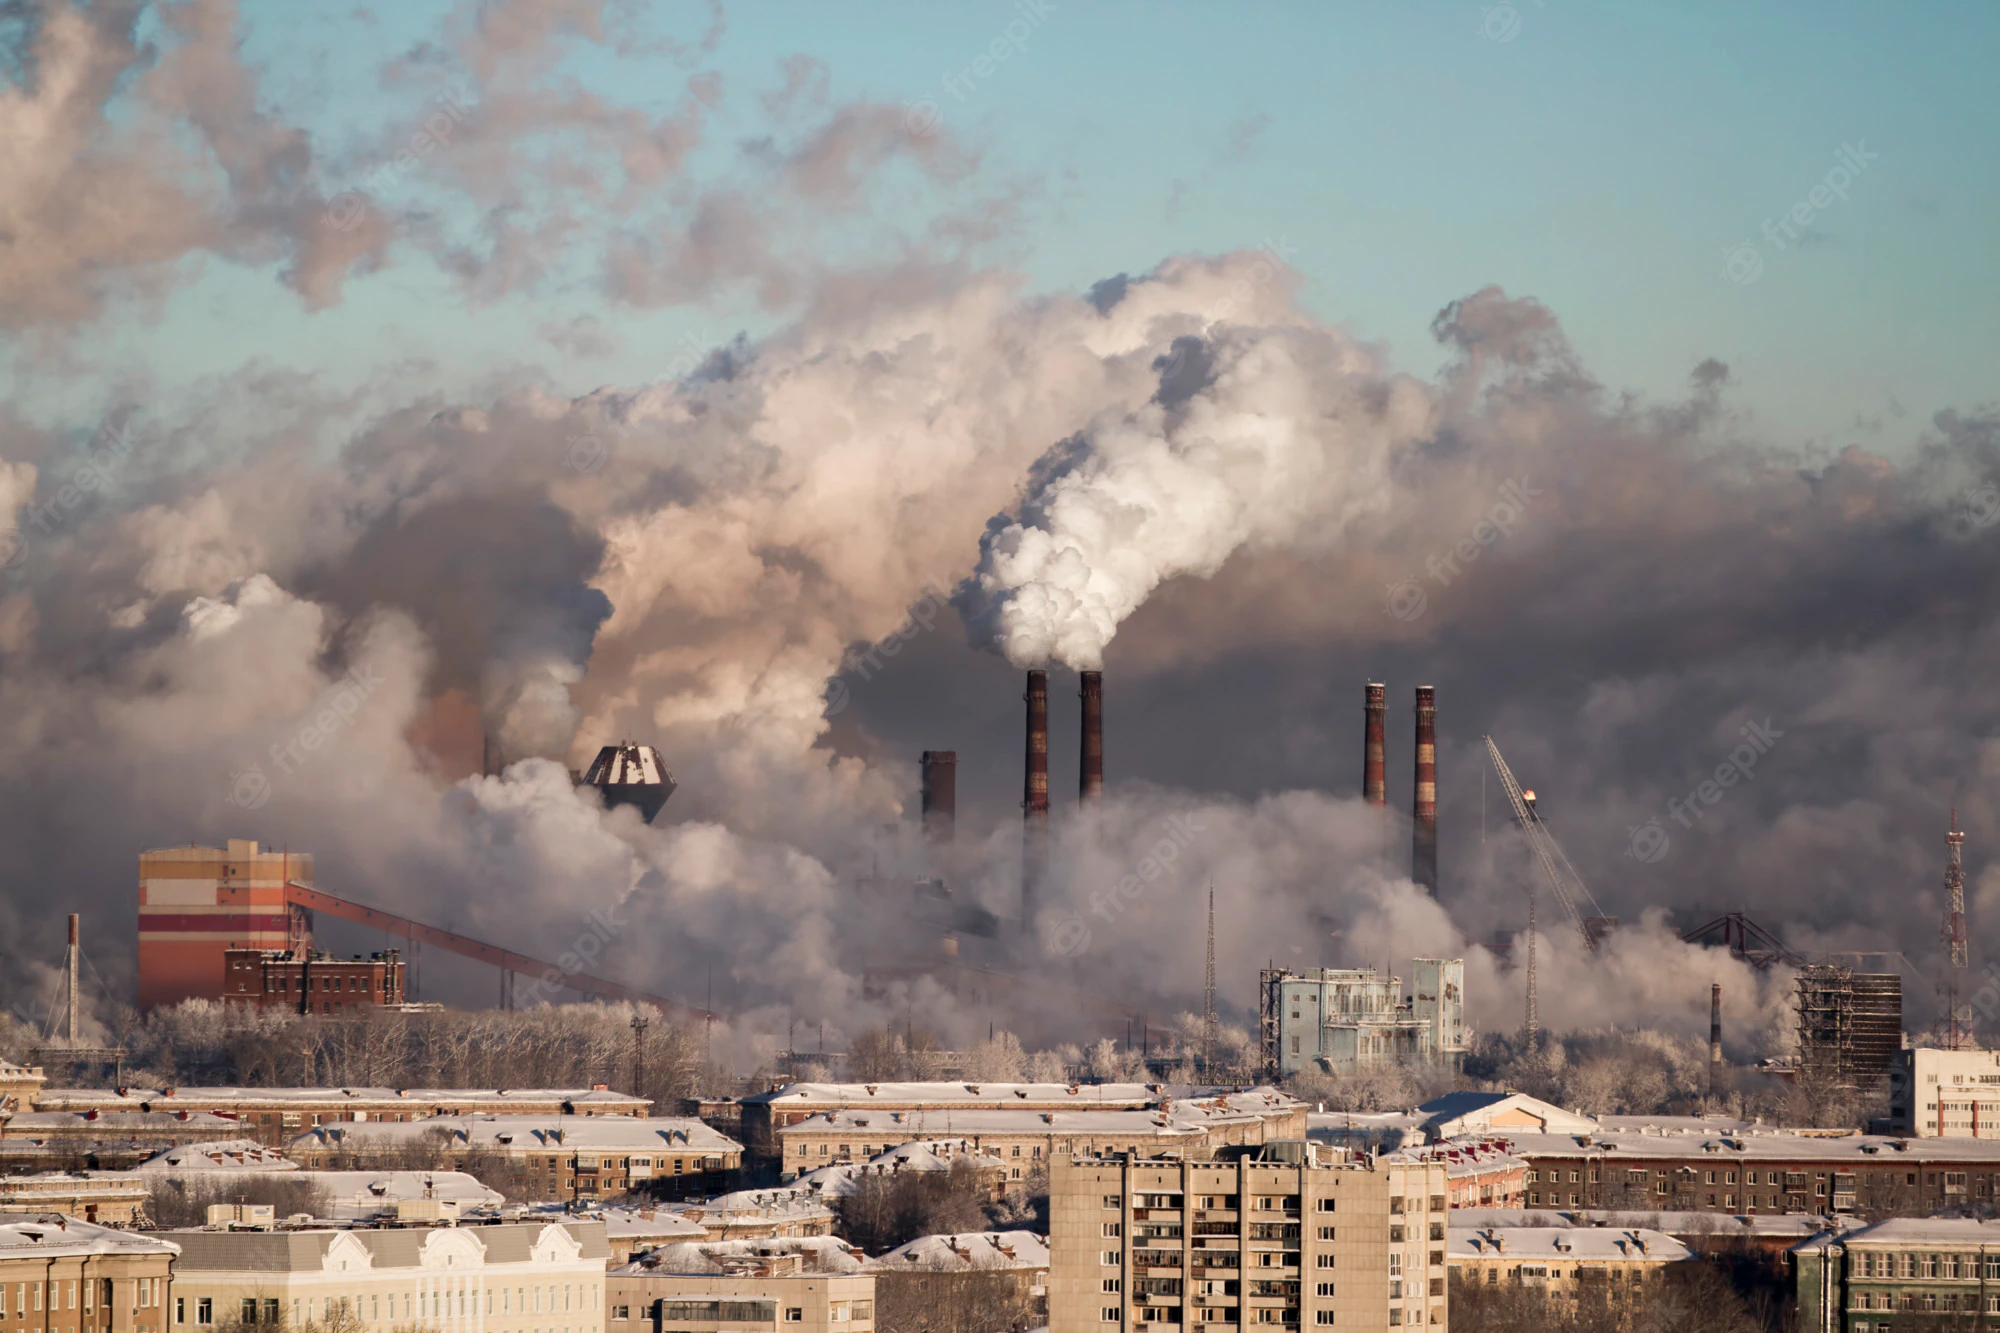

# Air Quality (Pollution) Data Analysis

In [2]:
import pandas as pd

In [3]:
data=pd.read_csv(r"E:\Data Analyst\Projects\Air Quality Index\air-quality-data.csv")

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31861 entries, 0 to 31860
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Timestamp  31861 non-null  datetime64[ns]
 1   PM2.5      31861 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 498.0 KB


In [5]:
data['Timestamp']=pd.to_datetime(data['Timestamp'])    # To convert a column datatype in Timestamp Format

# 1. Show the Year-Wise Pollution with a Line Chart

In [13]:
data.head()

,Timestamp,PM2.5
0,2018-01-01 00:00:00,90.19
1,2018-01-01 01:00:00,86.98
2,2018-01-01 02:00:00,86.06
3,2018-01-01 03:00:00,94.04
4,2018-01-01 04:00:00,108.78


In [6]:
data['Year'] = data.Timestamp.dt.year

In [15]:
data.head()

,Timestamp,PM2.5,Year
0,2018-01-01 00:00:00,90.19,2018
1,2018-01-01 01:00:00,86.98,2018
2,2018-01-01 02:00:00,86.06,2018
3,2018-01-01 03:00:00,94.04,2018
4,2018-01-01 04:00:00,108.78,2018


In [9]:
data.groupby("Year")['PM2.5'].mean()

Year
2018    54.468449
2019    49.511273
2020    42.386302
2021    44.850633
Name: PM2.5, dtype: float64

In [7]:
year_avg=data.groupby("Year")['PM2.5'].mean()

<AxesSubplot:xlabel='Year'>

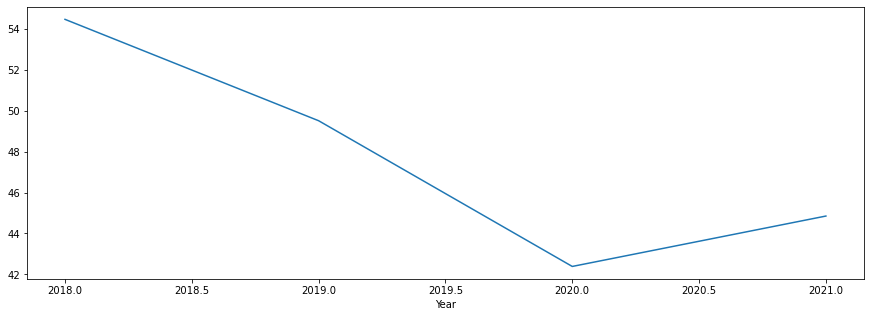

In [19]:
year_avg.plot(kind='line' , figsize = (15,5))

<AxesSubplot:ylabel='PM2.5'>

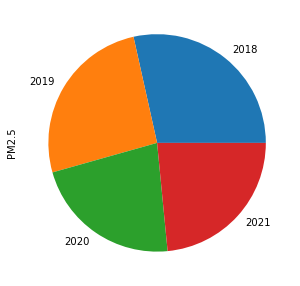

In [8]:
year_avg.plot(kind='pie' , figsize = (15,5))

# 2. Draw the Area Plot Showing the Average Pollution Month wise.

In [10]:
data['Month']=data.Timestamp.dt.month

In [21]:
data.head()

,Timestamp,PM2.5,Year,Month
0,2018-01-01 00:00:00,90.19,2018,1
1,2018-01-01 01:00:00,86.98,2018,1
2,2018-01-01 02:00:00,86.06,2018,1
3,2018-01-01 03:00:00,94.04,2018,1
4,2018-01-01 04:00:00,108.78,2018,1


In [11]:
month_avg=data.groupby('Month')['PM2.5'].mean()

In [12]:
month_avg

Month
1     65.829067
2     55.264291
3     49.666820
4     43.625814
5     39.816285
6     35.817151
7     31.884161
8     31.928300
9     36.324103
10    51.514817
11    60.017498
12    64.614865
Name: PM2.5, dtype: float64

<AxesSubplot:xlabel='Month'>

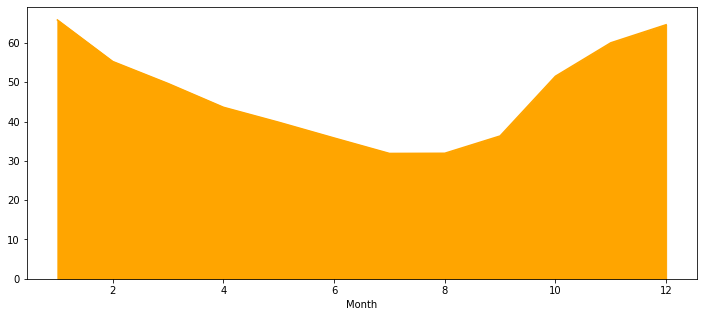

In [28]:
month_avg.plot(kind='area',figsize=(12,5) , color = 'orange')

<AxesSubplot:ylabel='PM2.5'>

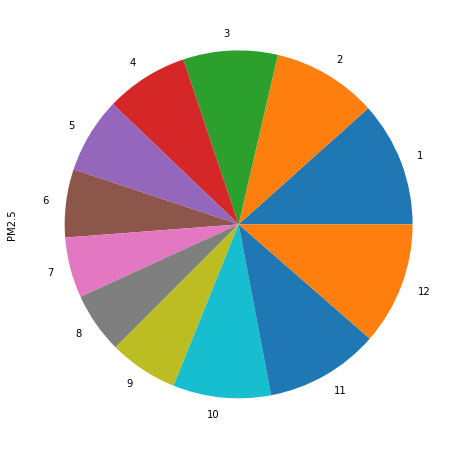

In [19]:
month_avg.plot(kind='pie',figsize=(15,8))

# 3. Draw a Bar Graph to show the Hour-Wise average Pollution

In [29]:
data['Hour']=data.Timestamp.dt.hour

In [30]:
data.head()

,Timestamp,PM2.5,Year,Month,Hour
0,2018-01-01 00:00:00,90.19,2018,1,0
1,2018-01-01 01:00:00,86.98,2018,1,1
2,2018-01-01 02:00:00,86.06,2018,1,2
3,2018-01-01 03:00:00,94.04,2018,1,3
4,2018-01-01 04:00:00,108.78,2018,1,4


In [42]:
hour_avg=data.groupby('Hour')['PM2.5'].mean()

In [43]:
hour_avg.head()

Hour
0    47.068769
1    46.403946
2    46.952281
3    49.150798
4    51.296204
Name: PM2.5, dtype: float64

<AxesSubplot:xlabel='Hour'>

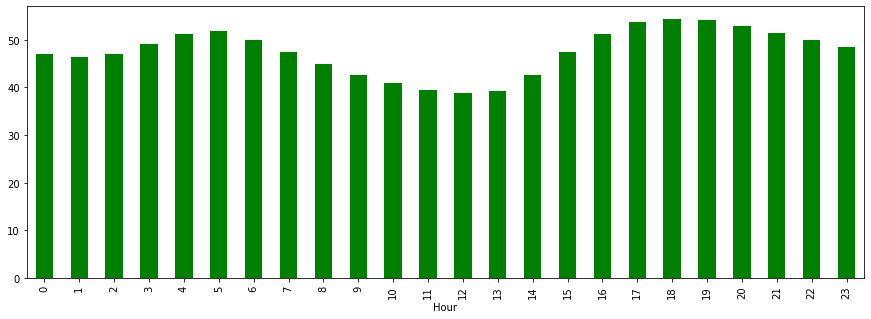

In [44]:
hour_avg.plot(kind='bar', figsize=(15,5), color='green')

# 4. Usually in which month, the air was recorded 'Very Unhealthy'

In [49]:
data[(data['PM2.5'] >= 150.5)&(data['PM2.5']<=250.4)]

,Timestamp,PM2.5,Year,Month,Hour,Hour_avg,hour_avg
6,2018-01-06 17:00:00,150.89,2018,1,17,49.907545,49.907545
7,2018-11-07 21:00:00,245.63,2018,11,21,47.518554,47.518554
8,2018-11-08 00:00:00,175.19,2018,11,0,44.996127,44.996127
31,2018-11-07 22:00:00,232.03,2018,11,22,NaN,NaN
32,2018-11-08 01:00:00,169.15,2018,11,1,NaN,NaN
55,2018-11-07 20:00:00,223.21,2018,11,20,NaN,NaN
56,2018-11-08 03:00:00,160.34,2018,11,3,NaN,NaN
79,2018-11-07 18:00:00,212.56,2018,11,18,NaN,NaN
103,2018-11-07 19:00:00,207.41,2018,11,19,NaN,NaN
126,2018-11-07 17:00:00,183.19,2018,11,17,NaN,NaN


In [50]:
x=data[(data['PM2.5'] >= 150.5)&(data['PM2.5']<=250.4)]

In [51]:
x.value_counts('Month')

Month
11    16
1      5
10     5
2      2
dtype: int64

# 5. Usually in which month, the air was fresh(good)

In [52]:
data[data['PM2.5']<=12.0]

,Timestamp,PM2.5,Year,Month,Hour,Hour_avg,hour_avg
11423,2019-06-22 08:00:00,11.53,2019,6,8,NaN,NaN
11424,2019-06-22 09:00:00,10.31,2019,6,9,NaN,NaN
11471,2019-06-24 08:00:00,10.98,2019,6,8,NaN,NaN
11472,2019-06-24 09:00:00,11.64,2019,6,9,NaN,NaN
11535,2019-06-27 00:00:00,11.77,2019,6,0,NaN,NaN
11874,2019-07-13 09:00:00,7.02,2019,7,9,NaN,NaN
11875,2019-07-13 10:00:00,7.48,2019,7,10,NaN,NaN
11876,2019-07-13 11:00:00,7.61,2019,7,11,NaN,NaN
11879,2019-07-13 14:00:00,11.08,2019,7,14,NaN,NaN
11880,2019-07-13 15:00:00,10.21,2019,7,15,NaN,NaN


In [54]:
y=data[data['PM2.5']<=12.0]

In [55]:
y.value_counts('Month')

Month
8    33
7     6
6     5
1     3
4     3
5     2
dtype: int64

# 6. In year 2018, How many times the AQI was recorded 'Moderate'

In [56]:
data[(data['Year']==2018) & (data['PM2.5']>=12.1)&(data['PM2.5']<=35.4)]

,Timestamp,PM2.5,Year,Month,Hour,Hour_avg,hour_avg
1820,2018-01-04 04:00:00,33.34,2018,1,4,NaN,NaN
2038,2018-12-04 00:00:00,35.39,2018,12,0,NaN,NaN
2215,2018-04-19 13:00:00,28.90,2018,4,13,NaN,NaN
2306,2018-04-23 09:00:00,34.83,2018,4,9,NaN,NaN
2307,2018-04-23 11:00:00,33.50,2018,4,11,NaN,NaN
...,...,...,...,...,...,...,...
9981,2018-06-28 06:00:00,19.75,2018,6,6,NaN,NaN
9982,2018-07-17 07:00:00,19.27,2018,7,7,NaN,NaN
9983,2018-07-16 08:00:00,18.96,2018,7,8,NaN,NaN
10004,2018-08-25 06:00:00,17.45,2018,8,6,NaN,NaN


In [57]:
z=data[(data['Year']==2018) & (data['PM2.5']>=12.1)&(data['PM2.5']<=35.4)]

In [58]:
z.Year.unique()

array([2018], dtype=int64)

In [59]:
z['PM2.5']

1820     33.34
2038     35.39
2215     28.90
2306     34.83
2307     33.50
         ...  
9981     19.75
9982     19.27
9983     18.96
10004    17.45
10006    18.77
Name: PM2.5, Length: 2239, dtype: float64

# 7. How was the weather in the month of January and July

In [60]:
data[data['Month']==1]['PM2.5'].mean()     # UNHEALTHY

65.82906685236783

In [61]:
data[data['Month']==7]['PM2.5'].mean()     # MODERATE

31.884161466458643